In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [5]:
seoul=pd.read_csv("seoul2020.csv",encoding = 'euc-kr')
seoul.head(10)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,6415600,169,...,0,63,106,0,10,139,10,5,5,8
1,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1853749205,8319,...,132,4331,3363,66,2146,2181,1234,1062,1003,8
2,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,10400909742,5270,...,35,2458,2812,0,0,245,1441,1722,1862,5
3,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,807257363,28506,...,580,9007,18931,232,10926,10020,3876,2101,781,6
4,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300027,섬유제품,1410497003,41063,...,1445,8135,32928,1478,20434,8248,5427,4241,1235,6
5,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300026,완구,506304623,7512,...,0,4912,2600,249,2291,2347,2089,387,149,8
6,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300024,운동/경기용품,10213546282,35419,...,1376,18762,16339,555,10560,12107,5540,3479,2861,14
7,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300022,화장품,21485482092,190038,...,12312,37285,149847,3352,75347,57329,30279,15452,5373,54
8,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300021,문구,3438138954,133503,...,3252,50184,69641,2429,40086,32355,22877,14868,7207,12
9,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300018,의약품,3228853269,293778,...,1146,136187,149807,1336,68694,83193,57138,47000,28634,8


In [4]:
type(seoul)

pandas.core.frame.DataFrame

In [8]:
seoul_kmeans = seoul.groupby('서비스_업종_코드_명')[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].sum()                     

In [10]:
seoul_kmeans

,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
서비스_업종_코드_명,,,,,,
PC방,4433489,30154986,7457362,2393056,2054842,392146
가구,2256,110521,213844,218471,241840,162595
가방,29349,504165,420042,303536,327860,276889
가전제품,4150,152449,323925,392415,412576,335351
가전제품수리,417,17363,36658,52925,50052,55375
...,...,...,...,...,...,...
한의원,17570,644519,1280917,1775671,2215957,2765314
핸드폰,312632,1258546,886145,1053984,737125,357216
호프-간이주점,467296,9530474,6054985,4004459,3299860,1400624


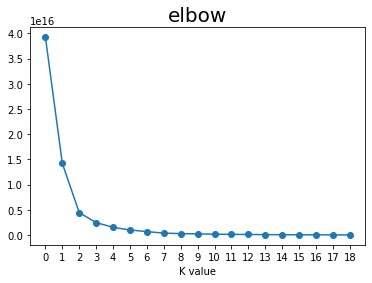

In [15]:
#print('Distortion : %.2f' % km.inertia)

distortions = []
for i in range(1,20):
    km = KMeans(n_clusters = i,init='k-means++',n_init=10, max_iter=300)
    km.fit(seoul_kmeans)
    distortions.append(km.inertia_)

plt.plot(range(len(distortions)), distortions, marker='o')
ticks = plt.xticks(range(len(distortions)))
plt.xlabel('K value')
plt.title('elbow',size=20)
plt.show()

In [20]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(seoul_kmeans)

KMeans(n_clusters=5, random_state=0)

In [21]:
print(kmeans.labels_)

[0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 0 3 2 3
 3 0 0 3 3 3 3 3 0 3 3 3 0 3 3 4 3 0 1 3 2 3 3 0 3 3]


In [25]:
seoul_kmeans['cluster']=kmeans.labels_

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(seoul_kmeans)

seoul_kmeans['pca_x'] = pca_transformed[:,0]
seoul_kmeans['pca_y'] = pca_transformed[:,1]
seoul_kmeans.head(3)

,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,pca_x,pca_y,cluster
서비스_업종_코드_명,,,,,,,,,
PC방,4433489,30154986,7457362,2393056,2054842,392146,2.660749e+07,-2.699742e+07,0
가구,2256,110521,213844,218471,241840,162595,-1.727940e+07,-2.352694e+06,3
가방,29349,504165,420042,303536,327860,276889,-1.650179e+07,-2.471213e+06,3


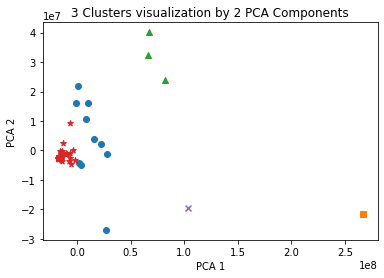

In [28]:
#군집 값이 0,1,2인경우마다 별도의 인덱스로 추출
marker0_ind = seoul_kmeans[seoul_kmeans['cluster']==0].index
marker1_ind =seoul_kmeans[seoul_kmeans['cluster']==1].index
marker2_ind = seoul_kmeans[seoul_kmeans['cluster']==2].index
marker3_ind = seoul_kmeans[seoul_kmeans['cluster']==3].index
marker4_ind = seoul_kmeans[seoul_kmeans['cluster']==4].index

#군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값추출 o,s,^로 마커표시
plt.scatter(x=seoul_kmeans.loc[marker0_ind,'pca_x'],y=seoul_kmeans.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=seoul_kmeans.loc[marker1_ind,'pca_x'],y=seoul_kmeans.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=seoul_kmeans.loc[marker2_ind,'pca_x'],y=seoul_kmeans.loc[marker2_ind,'pca_y'],marker='^')
plt.scatter(x=seoul_kmeans.loc[marker3_ind,'pca_x'],y=seoul_kmeans.loc[marker3_ind,'pca_y'],marker='*')
plt.scatter(x=seoul_kmeans.loc[marker4_ind,'pca_x'],y=seoul_kmeans.loc[marker4_ind,'pca_y'],marker='x')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters visualization by 2 PCA Components')
plt.show()